In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, train_test_split, RepeatedStratifiedKFold

from src.NN_model_class import Model
from src.constants import ALL_COLS, LABEL
from src.ETL_class import DataTransformer

# Single train run

In [2]:
raw_df = pd.read_csv('data/data_raw/train.csv')
X = raw_df[ALL_COLS]; y = raw_df[LABEL]
data_transform = DataTransformer(all_cols=ALL_COLS)

In [20]:
nn_pipe = Pipeline([
    ("data_tranformer", data_transform),
    ("model", Model())
])

nn_pipe.fit(X, y)


Pipeline(steps=[('data_tranformer',
                 DataTransformer(all_cols=['T_min', 'T_mean', 'T_max', 'P_min',
                                           'P_mean', 'P_max', 'U_min', 'U_mean',
                                           'U_max', 'Ff_min', 'Ff_mean',
                                           'Ff_max', 'N_min', 'N_mean', 'N_max',
                                           'VV_min', 'VV_mean', 'VV_max',
                                           'RRR_min', 'RRR_mean', 'RRR_max'])),
                ('model',
                 Model(
  (nll_loss): NLLLoss()
  (lin_1): Linear(in_features=31, out_features=5, bias=True)
  (gelu_1): GELU(approximate='none')
  (lin_2): Linear(in_features=5, out_features=2, bias=True)
  (m): LogSoftmax(dim=1)
))])

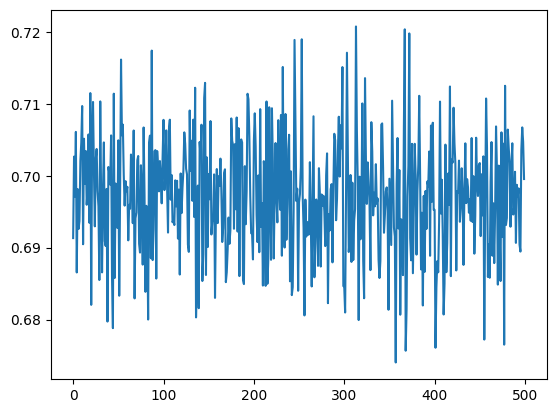

In [5]:
plt.plot(nn_pipe.named_steps['model'].all_losses, label='train')

In [7]:
nn_pipe.named_steps['model'].all_losses[-10:]

[0.6906635403633118,
 0.6987448453903198,
 0.6970804095268249,
 0.6982405662536622,
 0.6904290914535522,
 0.6894551932811737,
 0.7036147713661194,
 0.7067303359508514,
 0.7047174751758576,
 0.6995470404624939]

# CV NN

In [8]:
raw_df = pd.read_csv('data/data_raw/train.csv')
X = raw_df[ALL_COLS]; y = raw_df[LABEL]
data_transform = DataTransformer(all_cols=ALL_COLS)

nn_pipe = Pipeline([
    ("data_tranformer", data_transform),
    ("model", Model())
])

In [9]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
test_res = cross_validate(nn_pipe,
                          X=X,
                          y=y,
                          cv=kfold,
                          error_score='raise')

/Users/igorchebuniaev/.local/share/virtualenvs/RL_in_ksp--361CVkw/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:131: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Seems like `optimizer.step()` has been overridden after learning rate scheduler "
/Users/igorchebuniaev/.local/share/virtualenvs/RL_in_ksp--361CVkw/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:131: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Seems like `optimizer.step()` has been overridden after learning rate scheduler 

In [10]:
test_res['test_score'].mean()

0.6991432865460714

In [11]:
test_res['test_score']

array([0.70028633, 0.69431627, 0.6990428 , 0.69233614, 0.7106089 ,
       0.69584286, 0.68981618, 0.70290899, 0.70514542, 0.69414628,
       0.71329105, 0.70845979, 0.69153363, 0.70031101, 0.68910366])

# CV XGB

In [12]:
raw_df = pd.read_csv('data/data_raw/train.csv')
X = raw_df[ALL_COLS]; y = raw_df[LABEL]
data_transform = DataTransformer(all_cols=ALL_COLS)
# xgb = 

xgb_pipe = Pipeline([
    ("data_tranformer", data_transform),
    ("model", XGBClassifier(n_estimators=50, max_depth=3))
])

In [13]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
test_res = cross_validate(xgb_pipe,
                          X=X,
                          y=y,
                          cv=kfold,
                          error_score='raise')

test_res['test_score'].mean()

0.7212921065862242

In [14]:
test_res['test_score']

array([0.80769231, 0.74509804, 0.66666667, 0.68627451, 0.78431373,
       0.71153846, 0.7254902 , 0.76470588, 0.76470588, 0.58823529,
       0.69230769, 0.68627451, 0.70588235, 0.7254902 , 0.76470588])

In [15]:
xgb_pipe.fit(X, y)

Pipeline(steps=[('data_tranformer',
                 DataTransformer(all_cols=['T_min', 'T_mean', 'T_max', 'P_min',
                                           'P_mean', 'P_max', 'U_min', 'U_mean',
                                           'U_max', 'Ff_min', 'Ff_mean',
                                           'Ff_max', 'N_min', 'N_mean', 'N_max',
                                           'VV_min', 'VV_mean', 'VV_max',
                                           'RRR_min', 'RRR_mean', 'RRR_max'])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

# Saving prediction for submission

In [21]:
submit_pipe = nn_pipe
# submit_pipe = xgb_pipe

In [22]:
test_df = pd.read_csv('data/data_raw/test.csv').fillna(0)
pred = submit_pipe.predict(test_df[ALL_COLS]).reshape(-1,1)
submit_df = test_df[['Id']].copy()
submit_df.loc[:, 'y'] = pred

In [14]:
submit_df.to_csv('data/data_submissions/6th_submit.csv', index=False)

Overall result so far:
- XGB and NN pipes produce very similar results.
- Adding data transformation pipeline step reduces the kaggle score from around .61 ROC AUC to .51 ROC AUC. This needs to be investigated. 

Things to check:
- model might be overfitting to the open train data and performs badly on kaggle test, 
- NLL loss is optimised in training, while kaggle score is ROC AUC, might make sense to optimise ROC AUC direcly or at least score the model by it during CV and see if CV score is similar to kaggle score